# Network for Digits using one FullyConnectedLayer

## Summary
* Network with just one fully connected layer. Every input pixel is connected via a weight to every output category. Number of weights = 20x20 = 400.
* Best result: 85% classification of digits.

## Preliminaries

In [1]:
# Import packages
import sys
# If academia_ai is not installed, include its path here!
if '../../' not in sys.path:
    sys.path.append('../../')
import numpy as np # numpy to work with arrays
%matplotlib notebook 
import matplotlib.pyplot as plt # for the plots
import academia_ai as ai # import the academia_ai code!

Reloaded leafs!
Loaded preprocessing!
Reloaded plotting!


In [2]:
# Load digits from disk into collection D (optional filepath to archive "MNIST_academia.npz")
D = ai.digits.DigitCollection()
# Can access training images and solutions as "D.training_images" and  "D.training_solutions"
# and test images and solutions for validation as "D.test_images", "D.test_solutions"

<IPython.core.display.Javascript object>


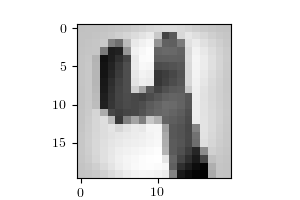

Label: 4


In [3]:
# Check out how a random digit looks like
plt.figure(figsize=(3,2))
plt.imshow(D.training_images[666], cmap='Greys')
print('Label:', np.argmax(D.training_solutions[666]))

## Create layers and build neural network

In [4]:
# 1. Create the layer that will constitute our neural network.
'''
It takes dimension (1, 20, 20) as each digit is represented by
one (greyscale) image of dimension 20x20 pixels. It returns
dimension (10, 1, 1) corresponding to the 10 possible outcomes
[0,1,2,3,4,5,6,7,8,9]. The arrays are always kept three-dimensional
for consistency and are stacked along the first axis (depth).
'''
full_layer = ai.FullyConnectedLayer(input_shape=(1,20,20), output_shape=(10,1,1))

# 2. Now build a convolutional neural network from the created layer
# first create a new empty net
net = ai.ConvolutionalNeuralNet()
# and now add our FullyConnectedLayer
net.add_layer(full_layer)
# print summary
net.pprint()
# Its weights are initialized randomly

Convolutional Neural Network containing the following 1 layers:
FullyConnectedLayer with input_shape (1, 20, 20) and output_shape (10, 1, 1)
Properites of weights: MIN= -0.2 MAX= 0.18 MEAN= -0.0 VAR= 0.0


## Check out forward propagation

<IPython.core.display.Javascript object>


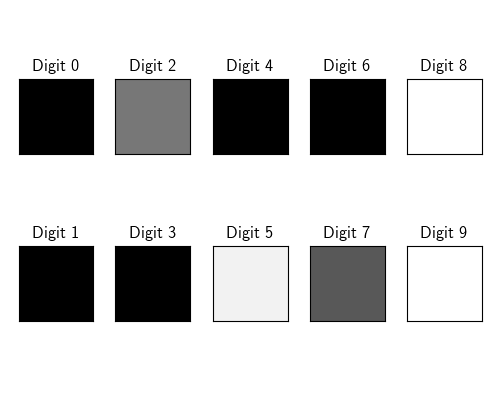

Classified label: 1
Correct label: 3


In [5]:
# Take the first digit and propagate it through the network
digit_index = 0
dig = D.training_images[digit_index]
sol = D.training_solutions[digit_index]
result = net.forward_prop(dig)

# Plot the result after propagating through the net
fig, axarr = plt.subplots(2, 5, figsize=(5,4))
for x in range(2):
    for y in range(5):
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=-1, vmax=1)
        axarr[x, y].set_title('Digit '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
plt.tight_layout()
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol))

In [6]:
# The results are random, because we did not train our network yet.

## Do some training and save the net

In [7]:
# A very small learning rate takes too much training time,
# a very large learning rate might lead to divergence of the weights!
learning_rate = 1e-5
net.train(D.training_images, D.training_solutions, learning_rate, iterations=5)
# [might take several seconds per iteration!]

In [8]:
# Save the network after training. 
# If you have a network you are happy with, always take checkpoints between
# calls to train(). If the net starts diverging during training the network is usually lost.
net.save('data/simple_dummy.pkl')

Saved net in file: data/simple_dummy.pkl


## Examine results of training

In [9]:
# Check probability of successful identification using the test set
net.test_net(D.test_images, D.test_solutions)

0.8229

In [10]:
# Inspect weight matrix properties
l=net.layers[0]
print('MIN:', np.min(l.W), 'MAX:', np.max(l.W),
      'MEAN:', np.mean(l.W), 'VAR:', np.var(l.W))

MIN: -0.137047490943 MAX: 0.123515106519 MEAN: -3.03445095914e-05 VAR: 0.000670766355308


<IPython.core.display.Javascript object>


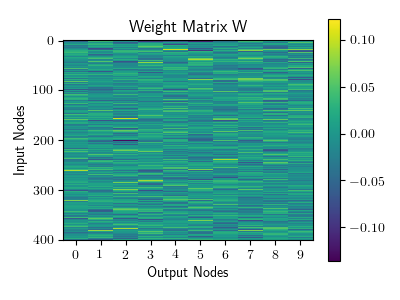

In [11]:
# Plot weight matrix elements
plt.figure(figsize=(4,3))
plt.title('Weight Matrix W')
plt.imshow(l.W, aspect=0.02, interpolation=None)
plt.ylabel('Input Nodes')
plt.xlabel('Output Nodes')
plt.xticks(np.arange(0,10,1))
plt.colorbar()
plt.tight_layout()

## Check a working, pretrained network

In [14]:
net_trained = ai.ConvolutionalNeuralNet.load('data/digit_fully_connected_trained.pkl')

In [15]:
# Check probability for successful identification
net_trained.test_net(D.test_images, D.test_solutions)

0.8584

<IPython.core.display.Javascript object>


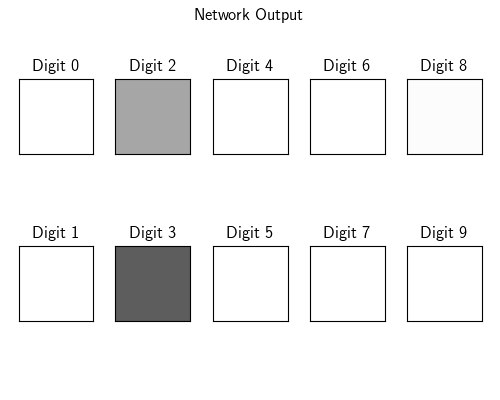

Classified label: 3
Correct label: 3


<IPython.core.display.Javascript object>


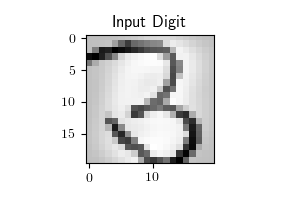

In [16]:
# Inspect some forward propagations
digit_index = 0 # Change index here to plot another one 

dig = D.training_images[digit_index]
sol = D.training_solutions[digit_index]
result = net_trained.forward_prop(dig)
fig, axarr = plt.subplots(2, 5, figsize=(5,4))
plt.suptitle('Network Output')
for x in range(2):
    for y in range(5):
        axarr[x, y].imshow(result[x+2*y], cmap='Greys', vmin=0, vmax=1)
        axarr[x, y].set_title('Digit '+str(x+2*y))
        axarr[x, y].get_xaxis().set_visible(False)
        axarr[x, y].get_yaxis().set_visible(False)
plt.tight_layout()
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol))
plt.figure(figsize=(3,2))
plt.imshow(dig, cmap='Greys')
plt.title('Input Digit')
plt.tight_layout()

## Great!